In [10]:
 import numpy as np

def influence2D(arr, ref):
    diff = None
    diffSign = None

    diff = np.mean(np.log(1 + np.abs(arr - ref)) / np.log(1 + max(1-ref, ref-0)))
    diffSign = np.sign( np.sign(arr - ref).mean() ) * diff

    return round(diff, 5), round(diffSign, 5)


arr = np.array([
    0, 
    0.1, 
    0.2,
    0.5,
    0.8, 
    0.9, 
    1
])

ref = 0.7
diff, diffSign = influence2D(arr, ref)

print('Diff', diff)
print('Sign', diffSign)


Diff 0.57302
Sign -0.57302


In [56]:
import seaborn as sns
import pandas as pd

l = 50
X = []

x = np.array(range(l), dtype=float) - l/2


uptrend_tmp = (x ** 2).tolist()
downtrend_tmp = (1 - x ** 2).tolist()


uptrend = uptrend_tmp[:25] + downtrend_tmp[25:]
downtrend = downtrend_tmp[:25] + uptrend_tmp[25:]

Yall = []
data = []
for i in range(20):
    Ysample = uptrend + ((np.random.rand(x.shape[0]) -0.5 )*200)
    Ysample /= 600
    Ysample = (Ysample + 1) / 2
    Yall.append(Ysample)
    for j, y in enumerate(Ysample):
        data.append({
            'id': f'u{i}',
            'x': x[j],
            'y': y,
            'trend': 'down'
        })


for i in range(20):
    Ysample = downtrend + ((np.random.rand(x.shape[0]) -0.5 )*200)
    Ysample /= 600
    Ysample = (Ysample + 1) / 2
    Yall.append(Ysample)
    for j, y in enumerate(Ysample):
        data.append({
            'id': f'd{i}',
            'x': x[j],
            'y': y,
            'trend': 'up'
        })

Yall = np.array(Yall)
pdp = np.mean(Yall, axis=0)
for j, y in enumerate(pdp):
    data.append({
        'id': f'pdp{i}',
        'x': x[j],
        'y': y,
        'trend': 'pdp'
    })   

df = pd.DataFrame(data)



<AxesSubplot:xlabel='x', ylabel='y'>

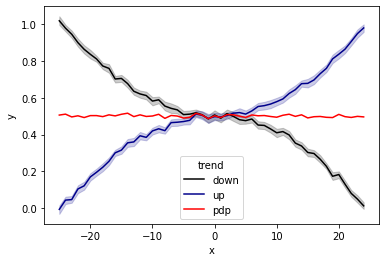

In [58]:
sns.lineplot(data=df, x='x', y='y', hue='trend', palette=['black', 'darkblue', 'red'])

[[6, 7, 8], [3, 4, 5], [0, 1, 2]]
